In [2]:
import numpy as np
from matplotlib import pyplot as plt
import keras
from keras.utils import to_categorical
from scipy.io import loadmat
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D


Load data from files

In [3]:
trX = loadmat('/content/drive/My Drive/train_32x32.mat')['X']
trY = loadmat('/content/drive/My Drive/train_32x32.mat')['y']
tsX = loadmat('/content/drive/My Drive/test_32x32.mat')['X']
tsY = loadmat('/content/drive/My Drive/test_32x32.mat')['y']

Convert training data and testing data to float64 format



In [4]:
trX = trX.astype('float64')
tsX = tsX.astype('float64')

Normalize the testing and testing data using shape.

In [5]:
trX = trX/255.0
tsX = tsX/255.0

Perform one hot encoding for training and testing labels.

In [6]:

trY = to_categorical(trY).astype('int64')
tsY = to_categorical(tsY).astype('int64')

In [7]:
trX.shape

(73257, 32, 32, 3)

In [8]:
trY.shape

(73257, 10)

Implemented using the below CNN Architecture and parameters

* The first hidden layer is a convolutional layer, with 64 output feature maps and kernel size of 5x5, stride 1 and activation as ReLU.
* The second layer is a max pooling layer with pooling as 2x2 and with stride 2.
* The third layer is a convulutional layer with 64 output feature maps and kernel size of 5x5 with stride 1 for convolution and activation as ReLU.
*   The fourth layer is a max pooling layer with pooling as 2x2 and stride as 2.
*   The 5th layer is connected to another convolutional layer, with 128 output feature maps. The convolution kernels are of 5x5 in size with stride 1 for convolution. The activation is ReLU.
*   We apply flattening before the fully connected layer.
* The next layer is a fully connected layer with 3072 nodes and ReLU activation function.
*   It  is followed by another fully connected layer with 2048 nodes and ReLU activation function
*   The last layer is a fully connected layer with 10 output nodes.








In [9]:

#create model
model = Sequential()
# model.add(keras.layers.Flatten())
model.add(Conv2D(64, kernel_size =(5, 5), padding='same', strides =(1, 1),
                 activation ='relu', input_shape=(32,32,3)))
model.add(MaxPooling2D(pool_size =(2, 2), padding='same', strides =(2, 2)))
model.add(Conv2D(64, (5, 5), strides = (1, 1), activation ='relu', padding='same', input_shape=(32,32,3)))
model.add(MaxPooling2D(pool_size =(2, 2),strides = (2,2), padding='same' ))
model.add(Conv2D(128, (5, 5), strides = (1, 1), activation ='relu', padding='same', input_shape=(32,32,3)))
model.add(Flatten())
model.add(Dense(3072, activation ='relu'))
model.add(Dense(2048, activation ='relu'))
model.add(Dense(10, activation ='softmax'))

The model is trained with loss as categorical crossentropy and is trained with SGD optimizer with a learning rate of 0.01

In [10]:
model.compile(loss = keras.losses.categorical_crossentropy,
              optimizer = keras.optimizers.SGD(lr = 0.01),
              metrics =['accuracy'])

In [11]:
history = model.fit(trX, trY,
          epochs = 20,
          batch_size = 32,
          validation_data =(tsX, tsY),
          verbose=1
          )

Epoch 1/20
2290/2290 [==============================] - 54s 10ms/step - loss: 2.2016 - accuracy: 0.2055 - val_loss: 1.0629 - val_accuracy: 0.6632
Epoch 2/20
2290/2290 [==============================] - 21s 9ms/step - loss: 0.7617 - accuracy: 0.7731 - val_loss: 0.5718 - val_accuracy: 0.8288
Epoch 3/20
2290/2290 [==============================] - 21s 9ms/step - loss: 0.4592 - accuracy: 0.8658 - val_loss: 0.4872 - val_accuracy: 0.8574
Epoch 4/20
2290/2290 [==============================] - 21s 9ms/step - loss: 0.3554 - accuracy: 0.8958 - val_loss: 0.4324 - val_accuracy: 0.8725
Epoch 5/20
2290/2290 [==============================] - 21s 9ms/step - loss: 0.2959 - accuracy: 0.9127 - val_loss: 0.4162 - val_accuracy: 0.8820
Epoch 6/20
2290/2290 [==============================] - 21s 9ms/step - loss: 0.2555 - accuracy: 0.9272 - val_loss: 0.3589 - val_accuracy: 0.9001
Epoch 7/20
2290/2290 [==============================] - 21s 9ms/step - loss: 0.2122 - accuracy: 0.9407 - val_loss: 0.3884 - val_a

Graphs for Epochs and Traning loss

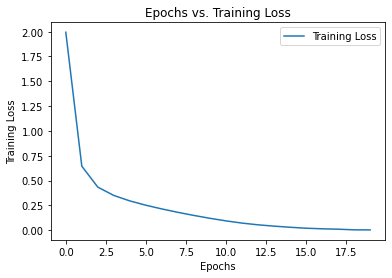

In [29]:


train_loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(train_loss, label='Training Loss')
plt.legend()
plt.title('Epochs vs. Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Training Loss')
plt.show()

Graph for Testing loss and Epochs

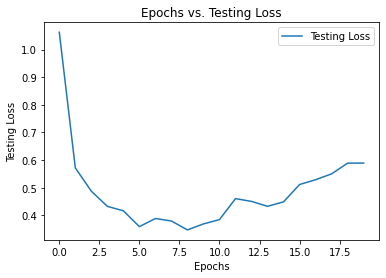

In [14]:
plt.plot(val_loss, label='Testing Loss')
plt.legend()
plt.title('Epochs vs. Testing Loss')
plt.xlabel('Epochs')
plt.ylabel('Testing Loss')
plt.show()

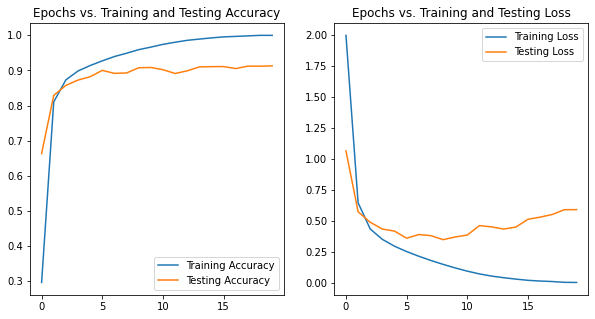

In [23]:
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Testing Accuracy')
plt.legend()
plt.title('Epochs vs. Training and Testing Accuracy')
    
plt.subplot(1, 2, 2)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Testing Loss')
plt.legend()
plt.title('Epochs vs. Training and Testing Loss')

plt.show()

Evaluating the model on Testing set

In [28]:
test_loss, test_acc = model.evaluate(x=tsX, y=tsY, verbose=0)

print('Test accuracy is: {:0.5f} \nTest loss is: {:0.5f}'.format(test_acc, test_loss))

Test accuracy is: 0.91295 
Test loss is: 0.58902
